# Parameter distribution
## Likelihood function
Assumed that the distribution of each single output $t$ in the data set is a Gaussian, for which the mean is the regression curve and the covariance is a known constant. Then the likelihood function is given by
$$p(\mathbb{t}|\mathbf{X}, \mathbf{w},\beta)=\prod_{n=1}^N\mathcal{N}(t_n|\mathbf{w}^T\phi(\mathbf{x}_n),\beta^{-1})\tag{3.10}$$
There is a weight parameter $\mathbf{w}$ which is on the peak of the likelihood function to make the regression curve fit the original curve mostly. This approach is called *Maximum likelihood*.

## Prior distribution
But if data set is not sufficiently large, data may lies. So we introduce the Bayesian Linear regression.

The likelihood function is the products of Gaussian functions, so the conjugate prior is also a Gaussian function.
$$p(\mathbf{w}) = \mathcal{N}(\mathbf{w}|\mathbf{m}_0, S_0)\tag{3.48}$$


## Posterior function
Our goal is to evaluate the distribution of $\mathbf{w}$ which is denoted by $p(\mathbf{w})$. Following the Bayesian theorem, this distribution is a conditional distribution takes the form
$$p(\mathbf{w}|\mathbf{X}, \mathbb{t})\propto p(\mathbb{t}|\mathbf{X},\mathbf{w})p(\mathbf{w})$$
where the likelihood distribution is consider a unnomalized distribution, thus we use the notaion $\propto$ here. Now let's **normalize this likelihood distribution**

$$\begin{align*}
\ln p_{norm}(\mathbb{t}|\mathbf{X},\mathbf{w})&=-\frac{1}{2}\beta\sum_{n=1}^N(t_n-\mathbf{w}^T\phi(\mathbf{x}_n))^2\\
&=-\frac{1}{2}\beta\sum_{n=1}^N
\left(t_n-
\begin{bmatrix}w_0 & \cdots &w_{m-1} \end{bmatrix}
\begin{bmatrix}\phi_0(\mathbf{x}_n) \\ \vdots \\ \phi_{m-1}(\mathbf{x}_n) \end{bmatrix}
\right)^2 \\
&=-\frac{1}{2}\beta
\left(
\begin{bmatrix}t_1 & \cdots &t_{N} \end{bmatrix}-
\begin{bmatrix}w_0 & \cdots &w_{m-1} \end{bmatrix}
\begin{bmatrix}\phi_0(\mathbf{x}_1) &\cdots &\phi_0(\mathbf{x}_N) \\
 \vdots &\ddots &\vdots\\
 \phi_{m-1}(\mathbf{x}_1) &\cdots &\phi_{m-1}(\mathbf{x}_N) \end{bmatrix}
\right) 
\left(
\begin{bmatrix}t_1 \\ \vdots \\ t_{N} \end{bmatrix}-
\begin{bmatrix}\phi_0(\mathbf{x}_1) &\cdots &\phi_{m-1}(\mathbf{x}_1) \\
 \vdots &\ddots &\vdots\\
 \phi_0(\mathbf{x}_N) &\cdots &\phi_{m-1}(\mathbf{x}_N) \end{bmatrix}
 \begin{bmatrix}w_0 \\ \vdots \\ w_{m-1} \end{bmatrix}
\right) 
\\
&=-\frac{1}{2}\beta(\mathbb{t}^T-\mathbf{w}^T\Phi^T)(\mathbb{t}-\Phi\mathbf{w})\qquad \Phi=
\begin{bmatrix}\phi_0(\mathbf{x}_1) &\cdots &\phi_{m-1}(\mathbf{x}_1) \\
 \vdots &\ddots &\vdots\\
 \phi_0(\mathbf{x}_N) &\cdots &\phi_{m-1}(\mathbf{x}_N) \end{bmatrix}\\
&=-\frac{1}{2}\beta(\mathbb{t}-\Phi\mathbf{w})^T(\mathbb{t}-\Phi\mathbf{w})\\
\Rightarrow p_{norm}(\mathbb{t}|\mathbf{X},\mathbf{w})&=\mathcal{N}(\mathbb{t}|\Phi\mathbf{w}, \beta^{-1})
\end{align*}$$

Then we can use (2.116) to write down the posterior distribution
$$
\left .
\begin{array}{ll}
p(\mathbf{w}) &= &\mathcal{N}(\mathbf{w}|\mathbf{m}_0, S_0) \\
p_{norm}(\mathbb{t}|\mathbf{X},\mathbf{w}) &= &\mathcal{N}(\mathbb{t}|\Phi\mathbf{w}, \beta^{-1}) \\
p(\mathbf{w}|\mathbf{X}, \mathbb{t}) &= &p_{norm}(\mathbb{t}|\mathbf{X},\mathbf{w})p(\mathbf{w}) 
\end{array}
\right\}
\overset{(2.116)}{\Rightarrow}
\left\{
\color{Red}{
\begin{array}{ll}
p(\mathbf{w}|\mathbf{X},\mathbb{t}) &= &\mathcal{N}(\mathbf{w}|\mathbf{m}_N, S_N)\\
\mathbf{m}_N &= &S_N(S_0^{-1}\mathbf{m}_0+\beta\Phi^T\mathbb{t})\\
S_N^{-1} &= &S_0^{-1}+\beta\Phi^T\Phi
\end{array}}
\right .
\tag{3.49, 3.50, 3.51}
$$

## Posterior of zero-mean isotropic prior
In the case that the prior distribution is zero-mean isotropic Gaussian which is expressed as
$$p(\mathbf{w}|\alpha)=\mathcal{N}(\mathbf{w}|0, \alpha^{-1}\mathbf{I}) \tag{3.52}$$
Then its corresponding posterior distribution over $\mathbf{w}$ is then given by 
$$
\color{Red}{
\begin{align*}
p(\mathbf{w}|\mathbf{X},\mathbb{t}) &= \mathcal{N}(\mathbf{w}|\mathbf{m}_N, S_N) \tag{3.49}\\
\mathbf{m}_N &= \beta S_N \Phi^T\mathbb{t} \tag{3.53}\\
S_N^{-1} &= \alpha\mathbf{I}+\beta\Phi^T\Phi \tag{3.54}
\end{align*}}
$$
- When $\alpha \to 0$, the mean $\mathbf{m}_N=(\Phi^T\Phi)^{-1}\Phi^T\mathbb{t} = \mathbf{w}_{ML}\ (3.15)$. This means if we donot specify a prior, the distribution will reduce to the maximum likelihood.
- When $N=0$, then the posterior distibution reverts to the prior.

The log of the posterior distribution is given by the sum of the log likelihood and log of the prior and, as a function of $\mathbf{w}$, takes the form
$$\ln p(\mathbf{w}|\mathbb{t})=\frac{\beta}{2}\sum_{n=1}^N\{t_n-\mathbf{w}^T\phi(\mathbf{x}_n)\}^2-\frac{\alpha}{2}\mathbf{w}^T\mathbf{w}+const$$
which can also be adjusted to the regularization form with $\lambda=\alpha/\beta$.


# Single-variant example
- Original line $y = -0.3+0.5x$.
- Noise variance $\beta^{-1} = 0.2^2$.
- Maximun likelihood variance $\beta^{-1} = 0.2^2$.
- Prior covariance $\alpha\mathbf{I}=\begin{bmatrix}2 &0\\ 0 &2\end{bmatrix}$.
- Prior mean $[0, 0]$
- Model $y = w_0+w_1\phi(x) = w_0+w_1x$.
- Basis function $\phi(x) = x$.

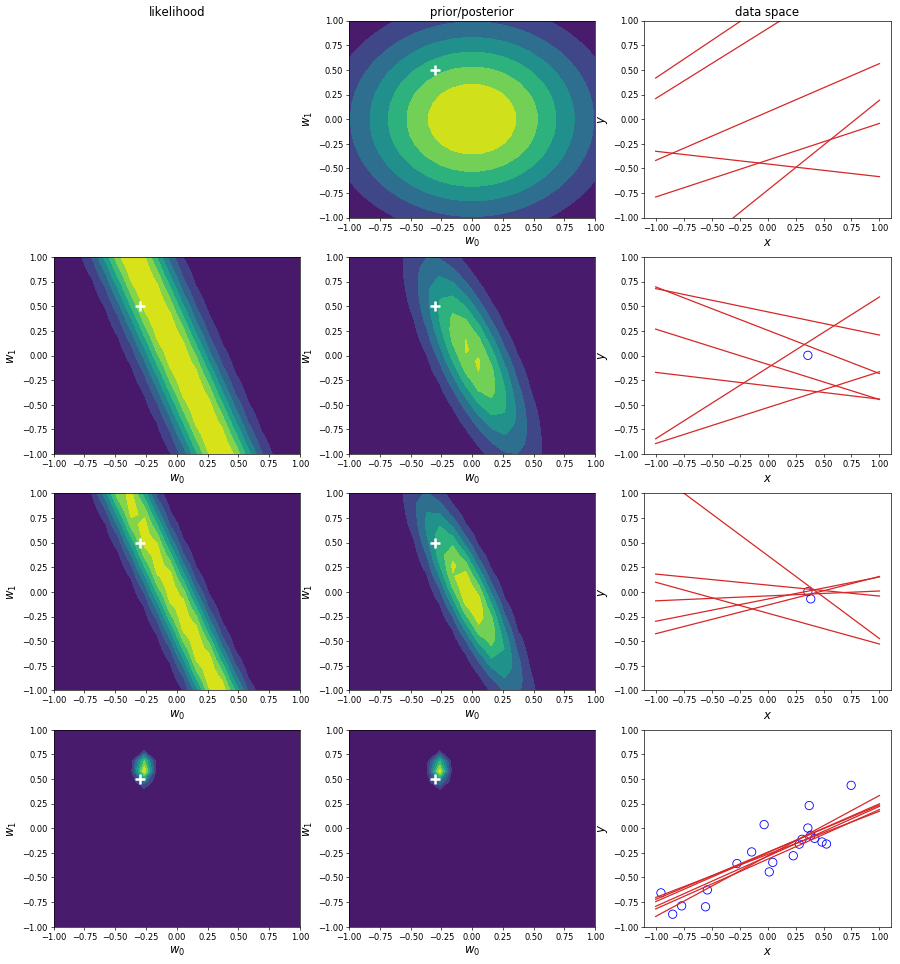

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


A = [-0.3, 0.5]
NOISE_SIGMA = 0.2

num_x = 20
num_y = 20

BETA = (1.0/NOISE_SIGMA)**2
ALPHA = 2.0

PRIOR_MU = [0.0, 0.0]
PRIOR_S = ALPHA * np.array([[1.0, 0.0],\
                           [0.0, 1.0]])

Gaussian = lambda w0, w1, x, y: 1.0/np.sqrt(2*np.pi*NOISE_SIGMA**2) * np.exp(-(y - (w0+w1*x))**2/(2*NOISE_SIGMA**2))

def Gaussian2D(w0, w1, M, S):
    diff0 = w0 - M[0]
    diff1 = w1 - M[1]
    diff = np.vstack((diff0, diff1))
    P = 1.0/(2*np.pi) * 1.0/(np.linalg.det(S)**0.5) * np.exp(-0.5 * np.sum(diff.T @ np.linalg.inv(S) * diff.T, axis=1))
    return P

def gen_data(n):
    if n == 0:
        return np.array([]), np.array([])
    x = np.random.uniform(-1, 1, n)
    noise = np.random.normal(loc=0,scale=NOISE_SIGMA, size=x.shape)
    y = A[0] + A[1]*x + noise
    return x,y

def plot_figures(ax1, ax2, ax3, xs, ys):
    W0, W1 = np.mgrid[-1:1:num_x*1j, -1:1:num_y*1j]
    WR0 = np.reshape(W0, num_x*num_y)
    WR1 = np.reshape(W1, num_x*num_y)
    
    # likelihood
    if len(xs) != 0:
        likelihood = np.ones(num_x*num_y)
        for i in range(len(xs)):
            likelihood *= Gaussian(WR0, WR1, xs[i], ys[i])
        LLH = np.reshape(likelihood, (num_x, num_y))
        ax1.contourf(W0, W1, LLH)
        ax1.plot([A[0]], [A[1]], '+', ms=12, markeredgewidth=3, color='white')
        ax1.set_xlabel(r"$w_0$", fontsize=14)
        ax1.set_ylabel(r"$w_1$", fontsize=14)
    
    # Phi Mean and covariance
    # y = w0+w1*x -> phi0 = 1, phi1 = x
    Phi = np.c_[np.ones((len(xs.T), 1)), xs.T]
    S = np.linalg.inv(PRIOR_S + BETA * Phi.T @ Phi)
    M = BETA * S @ Phi.T @ ys.T
    
    # Prior (first row) / Posterior distribution
    P = Gaussian2D(WR0, WR1, M, S)
    Posterior = np.reshape(P, (num_x, num_y))
    ax2.contourf(W0, W1, Posterior)
    ax2.plot([A[0]], [A[1]], '+', ms=12, markeredgewidth=3, color='white')
    ax2.set_xlabel(r"$w_0$", fontsize=14)
    ax2.set_ylabel(r"$w_1$", fontsize=14)
    
    # training data and estimated line
    ax3.set_ylim(-1, 1)
    ax3.scatter(xs,ys, s=100, facecolors='none', edgecolors='blue', label='training data')
    x = np.linspace(-1, 1, 10)
    weights = np.random.multivariate_normal(mean=M, cov=S, size=6)
    for w in weights:
        ax3.plot(x, w[0]+w[1]*x, color='C3')
    ax3.set_xlabel(r"$x$", fontsize=14)
    ax3.set_ylabel(r"$y$", fontsize=14)
    

def main():
    fig = plt.figure(figsize=(18,20), dpi=60)
    ax11 = fig.add_subplot(4,3,1)
    ax12 = fig.add_subplot(4,3,2)
    ax13 = fig.add_subplot(4,3,3)
    
    ax21 = fig.add_subplot(4,3,4)
    ax22 = fig.add_subplot(4,3,5)
    ax23 = fig.add_subplot(4,3,6)
    
    ax31 = fig.add_subplot(4,3,7)
    ax32 = fig.add_subplot(4,3,8)
    ax33 = fig.add_subplot(4,3,9)
    
    ax41 = fig.add_subplot(4,3,10)
    ax42 = fig.add_subplot(4,3,11)
    ax43 = fig.add_subplot(4,3,12)
    
    ax11.set_axis_off()
    ax11.set_title("likelihood", fontsize=14)
    ax12.set_title("prior/posterior", fontsize=14)
    ax13.set_title("data space", fontsize=14)
    
    xs, ys = gen_data(0)
    plot_figures(ax11, ax12, ax13, xs, ys)
    
    xs, ys = gen_data(1)
    plot_figures(ax21, ax22, ax23, xs, ys)
    
    xs_temp, ys_temp = gen_data(1)
    xs = np.hstack((xs, xs_temp))
    ys = np.hstack((ys, ys_temp))
    plot_figures(ax31, ax32, ax33, xs, ys)
    
    xs_temp, ys_temp = gen_data(18)
    xs = np.hstack((xs, xs_temp))
    ys = np.hstack((ys, ys_temp))
    plot_figures(ax41, ax42, ax43, xs, ys)
    
    plt.show()



if __name__ == "__main__":
    main()

-----------------

# Predictive distribution

In practice, we are not usually interested in the value of $\mathbf{w}$ itself but rather in making predictions of $t$ from new value of $\mathbf{x}$. This requires that we evaluate the predictive distribution defined by
$$p(t|\mathbf{x}, \mathbf{X}, \mathbb{t}) = \int p(t|\mathbf{x}, \mathbf{w})p(\mathbf{w}|\mathbf{X}, \mathbb{t})d\mathbf{w}\tag{3.57}$$
where
- $p(t|\mathbf{x}, \mathbf{X}, \mathbb{t})$ denotes the distribution of $t$ given input $\mathbf{x}$ after learning on the training set $\mathbf{X}$ and $\mathbb{t}$.
- $p(t|\mathbf{x}, \mathbf{w})$ denotes the assumed distribution of target $t$ given the input $\mathbf{x}$. These distributions on the training set forms the likelihood function.
- $p(\mathbf{w}|\mathbf{X}, \mathbb{t})$ denotes the distribution of the weight parameter after learning on the training set $\mathbf{X}$ and $\mathbb{t}$, which is also the posterior distribution we solved previously.
- $t$ is the output value of given input $\mathbf{x}$.
- $\mathbf{x}$ is the new input value.
- $\mathbf{X}$ is the input value of the training set.
- $\mathbb{t}$ is the output value of the training set.
- $\mathbf{w}$ is the weight parameter vector.
- $\alpha$, omitted parameter, is the covariance of isotropic prior distribution.
- $\beta$, omitted parameter, is the precision of the assumed distribution of target $t$ given the input $\mathbf{x}$. These distributions on the training set forms the likelihood function.

We have assumed that $p(t|\mathbf{x}, \mathbf{w})$ (the distribution of $t$) is a Gaussian in (3.8), and have just solved that the form of $p(\mathbf{w}|\mathbf{X}, \mathbb{t})$ (the distribution of $\mathbf{w}$). Then we can use (2.115) to obtain $p(t|\mathbf{x}, \mathbf{X}, \mathbb{t})$
$$
\left .
\begin{array}{ll}
p(t|\mathbf{x}, \mathbf{w}) &= &\mathcal{N}(t|\mathbf{y}(\mathbf{x},\mathbf{w}), \beta^{-1}) \\
p(\mathbf{w}|\mathbf{X}, \mathbb{t}) &= &\mathcal{N}(\mathbf{w}|\mathbf{m}_N, S_N) \\
p(t|\mathbf{x}, \mathbf{X}, \mathbb{t}) &= &\int p(t|\mathbf{x}, \mathbf{w})p(\mathbf{w}|\mathbf{X}, \mathbb{t})d\mathbf{w}
\end{array}
\right\}
\overset{(2.115)}{\Rightarrow}
\left\{
\color{Red}{
\begin{array}{ll}
p(t|\mathbf{x}, \mathbf{X}, \mathbb{t}) &= &\mathcal{N}(t|\mathbf{m}_N^T\phi(\mathbf{x}), \sigma_N^2(\mathbf{x}))\\
\sigma_N^2(\mathbf{x}) &= &\frac{1}{\beta}+\phi(\mathbf{x})^T S_N\phi(\mathbf{x})
\end{array}}
\right .
\tag{3.58, 3.59}
$$
In the variance,
- The first term $\frac{1}{\beta}$ represents the noise on the data.
- The second term $\phi(\mathbf{x})^T S_N\phi(\mathbf{x})$ represents the uncertainty associated with the parameter $\mathbf{w}$.
- The variance is the summation of these two terms because the noise process and the distribution of $\mathbf{w}$ are independent Gaussians.
- It can be shown (Qazaz et al., 1997) that $\sigma_{N+1}^2(\mathbf{x}) \leq \sigma_N^2(\mathbf{x})$. In the limit $N\to \infty$, the second term goes to zero, and the variance of the predictive distribution arises solely from the additive noise governed by the parameter $\beta$.


# Example
- Original curve $y = sin(2\pi x)$.
- Noise variance $\beta^{-1} = 0.2^2$.
- Maximun likelihood variance $\beta^{-1} = 0.2^2$.
- Prior covariance $\alpha\mathbf{I}$, where $\alpha=2$.
- Prior mean $[0\ \cdots\ 0]$
- Model $y = w_0+w_1 \phi_1(x)+\cdots+w_9 \phi_9(x)$.
- Basis functions $\phi_i(x) = Gau_i(x)$.
- Let Gaussian basis functions have the same variance and different mean.

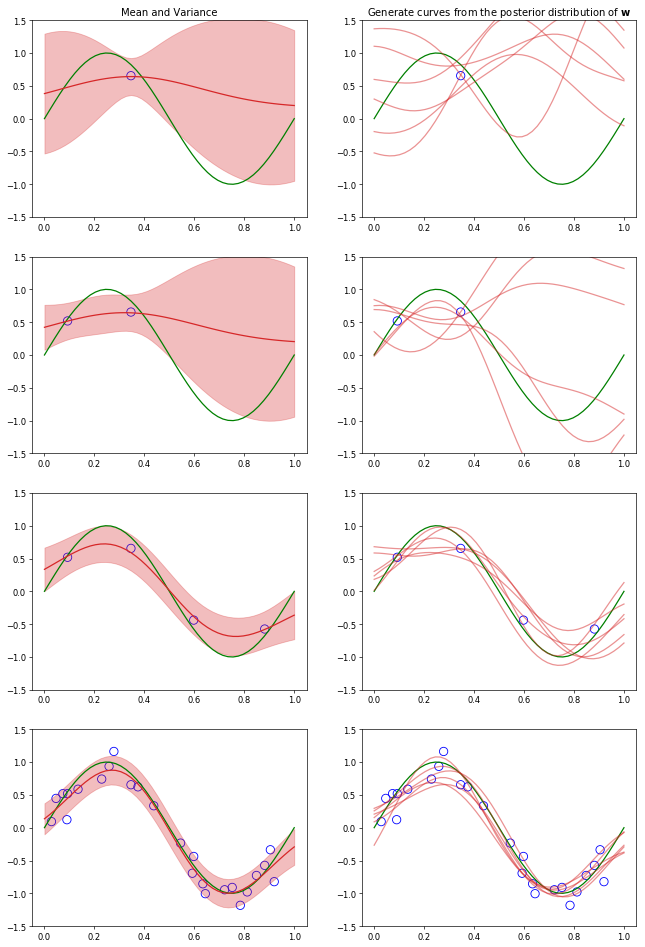

In [66]:
f = lambda x: np.sin(2*np.pi*x)
#f = lambda x: np.ones(x.shape)

# Gaussian basis parameters
# 1 bias and 9 gaussian basis functions form a model
K = 10
MU = np.linspace(0, 1.0, K-1)
SIGMA = 0.2
Gaussian_Basis = lambda x: np.exp(-(x-MU)**2/(2*SIGMA**2))

PRIOR_S = ALPHA * np.identity(K)

def build_Phi(xs):
    Phi = np.array([])
    for x in xs:
        if len(Phi) == 0:
            Phi = Gaussian_Basis(x)
        else:
            Phi = np.vstack((Phi, Gaussian_Basis(x)))
    if Phi.ndim == 1:
        Phi = [Phi]
    Phi = np.c_[np.ones((len(xs.T), 1)), Phi]
    return Phi

def gen_sin_data(n):
    if n == 0:
        return np.array([]), np.array([])
    x = np.random.uniform(0, 1, n)
    noise = np.random.normal(loc=0,scale=NOISE_SIGMA, size=x.shape)
    y = f(x) + noise
    return x,y

# Plot training data and target distribution
def plot_target_figure(ax, xs, ys, Phi, S, M):
    ax.set_ylim(-1.5, 1.5)
    ax.scatter(xs, ys, s=100, facecolors='none', edgecolors='blue', label='training data')
    
    x = np.linspace(0, 1, 50)
    ax.plot(x, f(x), color='green')
    
    ST = np.zeros(x.shape)
    MT = np.zeros(x.shape)
    for i in range(len(x)):
        phi = Gaussian_Basis(x[i])
        phi = np.hstack(([1], phi))
        ST[i] = 1.0/BETA + phi @ S @ phi.T
        MT[i] = M @ phi.T
    
    ax.plot(x, MT, color='C3')
    
    SST = np.sqrt(ST)
    ax.fill_between(x, MT-SST, MT+SST, color='C3', alpha=0.3)
        

# Plot training data and estimated line
def plot_curves(ax, M, S, xs, ys, n):
    ax.set_ylim(-1.5, 1.5)
    ax.scatter(xs, ys, s=100, facecolors='none', edgecolors='blue', label='training data')
    
    x = np.linspace(0, 1, 50)
    ax.plot(x, f(x), color='green')
    
    Phi = build_Phi(x)
    
    for i in range(n):
        weights = np.random.multivariate_normal(mean=M, cov=S, size=6)
        y = Phi @ weights.T
        ax.plot(x, y, color='C3', alpha=0.5)
            
    
def plot_figures(ax1, ax2, xs, ys):
    # Phi Mean and covariance
    # y = w0+w1*g1(x)+w2*g2(x)+... -> phi0 = 1, phi1 = g1(x), ...
    Phi = build_Phi(xs)
    S = np.linalg.inv(PRIOR_S + BETA * Phi.T @ Phi)
    M = BETA * S @ Phi.T @ ys.T
    
    plot_target_figure(ax1, xs, ys, Phi, S, M)
    plot_curves(ax2, M, S, xs, ys, 1)
    
def main():
    fig = plt.figure(figsize=(13,20), dpi=60)
    ax11 = fig.add_subplot(4,2,1)
    ax12 = fig.add_subplot(4,2,2)
    
    ax21 = fig.add_subplot(4,2,3)
    ax22 = fig.add_subplot(4,2,4)
    
    ax31 = fig.add_subplot(4,2,5)
    ax32 = fig.add_subplot(4,2,6)
    
    ax41 = fig.add_subplot(4,2,7)
    ax42 = fig.add_subplot(4,2,8)
    
    ax11.set_title("Mean and Variance")
    ax12.set_title(r"Generate curves from the posterior distribution of $\mathbf{w}$")
    xs, ys = gen_sin_data(1)
    plot_figures(ax11, ax12, xs, ys)
    
    xs_temp, ys_temp = gen_sin_data(1)
    xs = np.hstack((xs, xs_temp))
    ys = np.hstack((ys, ys_temp))
    plot_figures(ax21, ax22, xs, ys)
    
    xs_temp, ys_temp = gen_sin_data(2)
    xs = np.hstack((xs, xs_temp))
    ys = np.hstack((ys, ys_temp))
    plot_figures(ax31, ax32, xs, ys)
    
    xs_temp, ys_temp = gen_sin_data(21)
    xs = np.hstack((xs, xs_temp))
    ys = np.hstack((ys, ys_temp))
    plot_figures(ax41, ax42, xs, ys)

    plt.show()



if __name__ == "__main__":
    main()

----------------------

# Equivalent kernel
## Derivation and definition
$$\begin{align*}
y(\mathbf{x}, \mathbf{m}_N) &= \mathbf{m}_N^T\phi(\mathbf{x})\\
&=\beta (S_N \Phi^T \mathbb{t})^T\phi(\mathbf{x})\\
&=\beta \phi(\mathbf{x})^T S_N \Phi^T\mathbb{t}\qquad y\ is\ single\ output\\
&=\beta \phi(\mathbf{x})^T S_N 
\begin{bmatrix}
\phi_0(\mathbf{x}_1) &\cdots &\phi_0(\mathbf{x}_N)\\
\vdots &\ddots &\vdots\\
\phi_{M-1}(\mathbf{x}_1) &\cdots &\phi_{M-1}(\mathbf{x}_N)
\end{bmatrix}
\begin{bmatrix} t_1\\ \vdots\\ t_N\end{bmatrix}\\
&=\beta \phi(\mathbf{x})^T S_N 
\begin{bmatrix}
\sum_{n=1}^N\phi_0(\mathbf{x}_n)t_n\\
\vdots\\
\sum_{n=1}^N\phi_{M-1}(\mathbf{x}_n)t_n\\
\end{bmatrix}\\
&=\sum_{n=1}^N\beta \phi(\mathbf{x})^T S_N 
\begin{bmatrix}
\phi_0(\mathbf{x}_n)\\
\vdots\\
\phi_{M-1}(\mathbf{x}_n)\\
\end{bmatrix}t_n\\
&=\sum_{n=1}^N\beta\phi(\mathbf{x})^T S_N \phi(\mathbf{x}_n)t_n \tag{3.60}\\
\color{Red}{y(\mathbf{x}, \mathbf{m}_N)} &=\color{Red}{\sum_{n=1}^Nk(\mathbf{x},\mathbf{x}_n)t_n} \tag{3.61}\\
where\ \color{Red}{k(\mathbf{x},\mathbf{x}')} &= \color{Red}{\beta\phi(\mathbf{x})^T S_N \phi(\mathbf{x}')} \tag{3.62}
\end{align*}$$
which is known as the *smoother matrix* or the *equivalent kernel*. From the these equations we can conclude that
- Kernel depends on the input values $\mathbf{x}_n$ from the data set because these appear in the definition of $S_N$.
- From the perspective of kernel functions, regression functions makes predictions by taking linear combinations of the training target values.

## Relation between training data and predictive data
$$\begin{align*}
cov[y(\mathbf{x}), y(\mathbf{x}')]
&=cov[\mathbf{w}^T\phi(\mathbf{x}), \mathbf{w}^T\phi(\mathbf{x}')]\\
&=cov[\phi(\mathbf{x})^T\mathbf{w}, \mathbf{w}^T\phi(\mathbf{x}')]\qquad y(\mathbf{x})\ is\ single\ output\\
&=\mathbb{E}\big[\big(\phi(\mathbf{x})^T\mathbf{w}-\mathbb{E}[\phi(\mathbf{x})^T\mathbf{w}]\big)\big(\mathbf{w}^T\phi(\mathbf{x}')-\mathbb{E}[\mathbf{w}^T\phi(\mathbf{x}')]\big)\big]\\
&=\mathbb{E}\big[\phi(\mathbf{x})^T(\mathbf{w}-\mathbf{m}_N)(\mathbf{w}-\mathbf{m}_N)^T\phi(\mathbf{x}')\big]\\
&=\phi(\mathbf{x})^T\mathbb{E}\big[(\mathbf{w}-\mathbf{m}_N)(\mathbf{w}-\mathbf{m}_N)^T\big]\phi(\mathbf{x}')\\
&=\phi(\mathbf{x})S_N\phi(\mathbf{x}')\\
&=\beta^{-1}k(\mathbf{x},\mathbf{x}') \tag{3.63}
\end{align*}$$
As we can see, the kernel represents the relation between the predictive target and the training targets. Higher kernel turns out to higher covariance, which refers to the input from the training sets that localized around the input $\mathbf{x}$. In other words, the input $\mathbf{x}_n$ from the training sets that is nearer to $\mathbf{x}$ should takes higher weights on its training target when predicting the target of $\mathbf{x}$. 


## Summation
<font color='red'>The prediction of a new value of $\mathbf{x}$ can be regarded as a linear combination of the training targets $\mathbb{t}$. And the weights of the combination is the kernels, for which the summation is equal to $1$.</font> Here is an informal proof. Consider a set of target data in which $t_n=1$ for all $n$. The basis functions multiply by the expected weights gives the target value, which takes the form
$$
\mathbb{t}=\Phi\mathbf{w}=
\begin{bmatrix}
1 &\phi_1(\mathbf{x}_1) &\cdots &\phi_{M-1}(\mathbf{x}_1)\\
1 &\phi_1(\mathbf{x}_2) &\cdots &\phi_{M-1}(\mathbf{x}_2)\\
\vdots &\vdots &\ddots &\vdots \\
1 &\phi_1(\mathbf{x}_N) &\cdots &\phi_{M-1}(\mathbf{x}_N)\\
\end{bmatrix}
\begin{bmatrix}w_0 \\ w_1\\ \vdots\\ w_{M-1}\end{bmatrix}
=
\begin{bmatrix}1 \\ 1\\ \vdots\\ 1\end{bmatrix}
$$

Obviously, $\mathbf{w}$ has solutions. We can therefore consider that the predictive mean $\hat{y}(\mathbf{x})$ is equal to 1. And then we can write

$$
\left .
\begin{array}{rr}
y(\mathbf{x}, \mathbf{m}_N)=\displaystyle{\sum_{n=1}^N k(\mathbf{x},\mathbf{x}_n)t_n}\\
t_1=t_2=\cdots=t_N=1\\
y(\mathbf{x}, \mathbf{m}_N)=\hat{y}(\mathbf{x})=1
\end{array}
\right \}
\Rightarrow
\color{Red}{\sum_{n=1}^N k(\mathbf{x},\mathbf{x}_n)=1} \tag{3.64}
$$

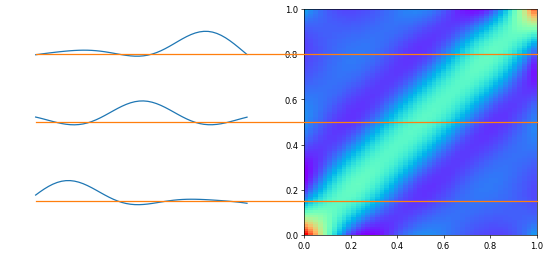

0.97080426267466
0.9768574509329404
0.982363141559888
0.9873188203285919
0.9917268443336641
0.9955943658437754
0.9989331895174043
1.0017595650261384
1.0040939182782074
1.005960525529008
1.0073871356760868
1.0084045469502172
1.0090461450063393
1.0093474100770479
1.0093454013625096
1.0090782271856709
1.008584509633747
1.0079028524357743
1.0070713206913484
1.006126940773326
1.0051052282844606
1.004039751367154
1.0029617359590024
1.0018997187696486
1.0008792528479433
0.9999226696255735
0.9990489002905275
0.9982733582746498
0.9976078835609161
0.9970607484412366
0.9966367233089843
0.9963372000656873
0.9961603697799821
0.9961014503650228
0.996152959262494
0.9963050254377512
0.9965457344177191
0.9968614996409083
0.9972374530505831
0.9976578476412311
0.9981064645725928
0.9985670174893603
0.9990235468268834
0.9994607971411881
0.9998645708625088
1.0002220523379715
1.0005220965839172
1.000755477806804
1.000915093461311
1.0009961203877649
1.0009961203878044
1.000915093461354
1.000755477806772
1.000

In [69]:
from matplotlib import lines

NUM_X = 100
NUM_XN = 50

Pos_X = (NUM_X*np.array([0.15, 0.50, 0.80])).astype(int)

def kernel(x, xn, S):
    phi_x = np.hstack(([1], Gaussian_Basis(x)))
    phi_xn = np.hstack(([1], Gaussian_Basis(xn)))
    k = BETA * phi_x @ S @ phi_xn.T
    return k

def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    x = np.linspace(0, 1, NUM_X)
    xn = np.linspace(0, 1, NUM_XN)
    
    # Phi Mean and covariance
    # y = w0+w1*g1(x)+w2*g2(x)+... -> phi0 = 1, phi1 = g1(x), ...
    Phi = build_Phi(xn)
    S = np.linalg.inv(PRIOR_S + BETA * Phi.T @ Phi)
    
    X, XN = np.meshgrid(x, xn)
    X = X.T
    XN = XN.T
    K = np.zeros(X.shape)
    for j in range(len(x)):
        for i in range(len(xn)):
            K[j][i] = kernel(x[j], xn[i], S)
    
    # plot k(x, xn) with fixed x and let xn to be the variable
    ax1.set_ylim(0, 1)
    ax1.set_axis_off()
    for pos in Pos_X:
        ax1.plot(XN[pos], K[pos]+X[pos], color='C0')
        s = [0, 1.0*pos/NUM_X]
        t = [1, 1.0*pos/NUM_X]
    
        transFigure = fig.transFigure.inverted()
        coord_s = transFigure.transform(ax1.transData.transform(s))
        coord_t = transFigure.transform(ax2.transData.transform(t))
        line = lines.Line2D((coord_s[0],coord_t[0]),(coord_s[1],coord_t[1]),
                               transform=fig.transFigure, color='C1')
        fig.lines.append(line)

    # plot k(x, xn)
    ax2.pcolormesh(XN, X, K, cmap = cm.rainbow)
    plt.show()
    
    # summation of k(x, xn) for each fixed x
    for k in K:
        print(np.sum(k))




if __name__ == "__main__":
    main()